In [1]:
# D209 Code

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

C:\Users\bower\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Import csv dataset

medical_data = pd.read_csv(r"C:\Users\bower\OneDrive\Desktop\WGU\D208\3kfid8emf9rkc9ek30sf (2)\medical_clean.csv")

In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
medical_df = medical_data[["ReAdmis", "TotalCharge", "Initial_days"]]

In [6]:
medical_df.shape

(10000, 3)

In [7]:
medical_df.head()

,ReAdmis,TotalCharge,Initial_days
0,No,3726.702860,10.585770
1,No,4193.190458,15.129562
2,No,2434.234222,4.772177
3,No,2127.830423,1.714879
4,No,2113.073274,1.254807


In [8]:
medical_df.isnull().sum()

ReAdmis         0
TotalCharge     0
Initial_days    0
dtype: int64

In [9]:
medical_df.describe()

,TotalCharge,Initial_days
count,10000.000000,10000.000000
mean,5312.172769,34.455299
std,2180.393838,26.309341
min,1938.312067,1.001981
25%,3179.374015,7.896215
50%,5213.952000,35.836244
75%,7459.699750,61.161020
max,9180.728000,71.981490


In [10]:
# Summary Statistics


In [11]:
medical_df['ReAdmis'].value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [12]:
medical_df['ReAdmis'].describe()

count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

In [13]:
medical_df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [14]:
medical_df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [15]:
# Check for outliers

<Axes: xlabel='TotalCharge'>

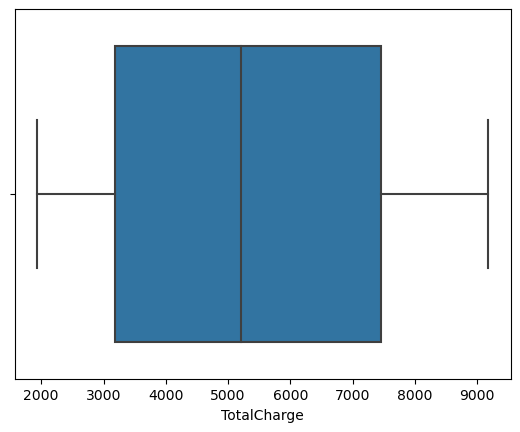

In [16]:
# TotalCharge

sns.boxplot(x = 'TotalCharge', data = medical_df)

<Axes: xlabel='Initial_days'>

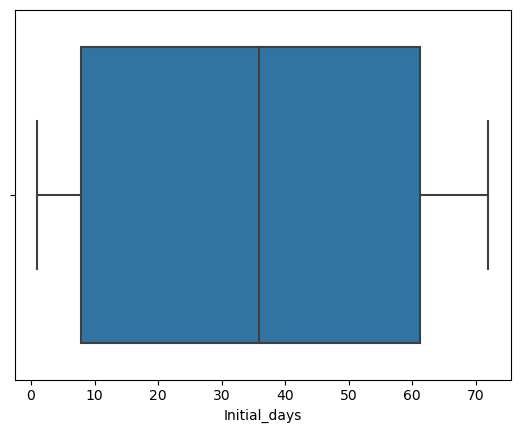

In [17]:
# Initial_days

sns.boxplot(x = 'Initial_days', data = medical_df)

In [18]:
# Check distributions of each variable

In [19]:
# Univariate

array([[<Axes: title={'center': 'TotalCharge'}>,
        <Axes: title={'center': 'Initial_days'}>]], dtype=object)

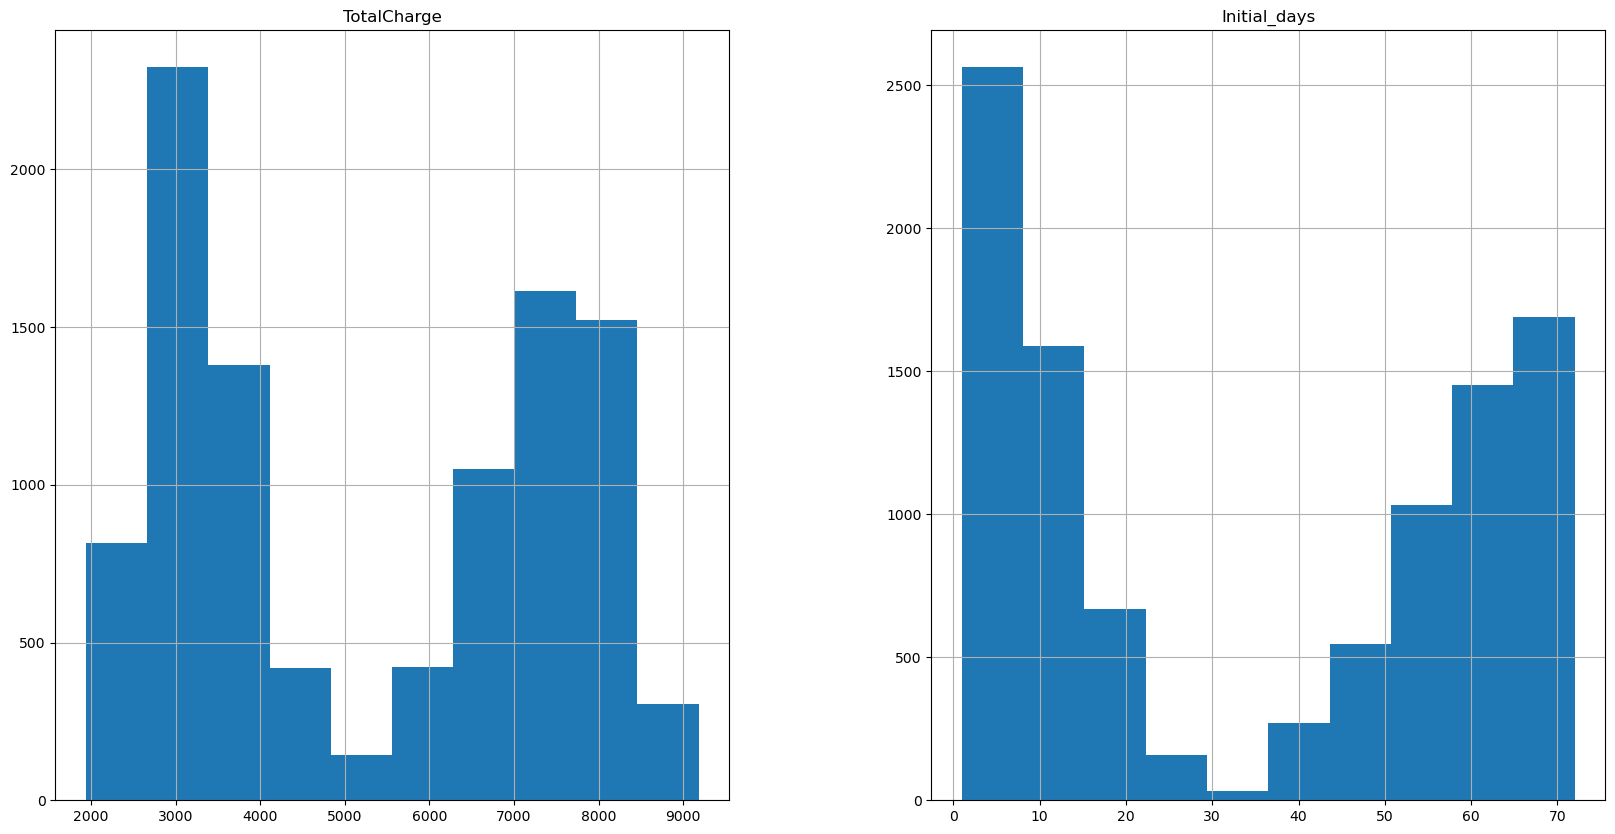

In [20]:
# Numeric Variables TotalCharge and Initial_days

medical_df[['TotalCharge', 'Initial_days']].hist(figsize=(20,10))

<Axes: title={'center': 'Readmission'}, xlabel='ReAdmis', ylabel='Instances'>

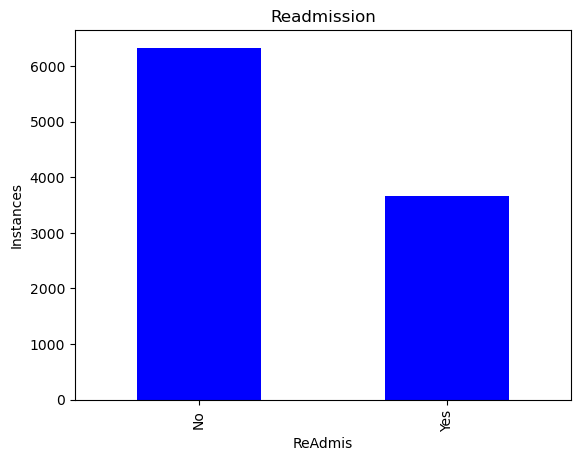

In [21]:
# Categorical variable ReAdmis

medical_df['ReAdmis'].value_counts().plot(kind='bar', color="Blue", ylabel="Instances", title="Readmission")


In [22]:
# Bivariate Distributions

<Axes: xlabel='TotalCharge', ylabel='Initial_days'>

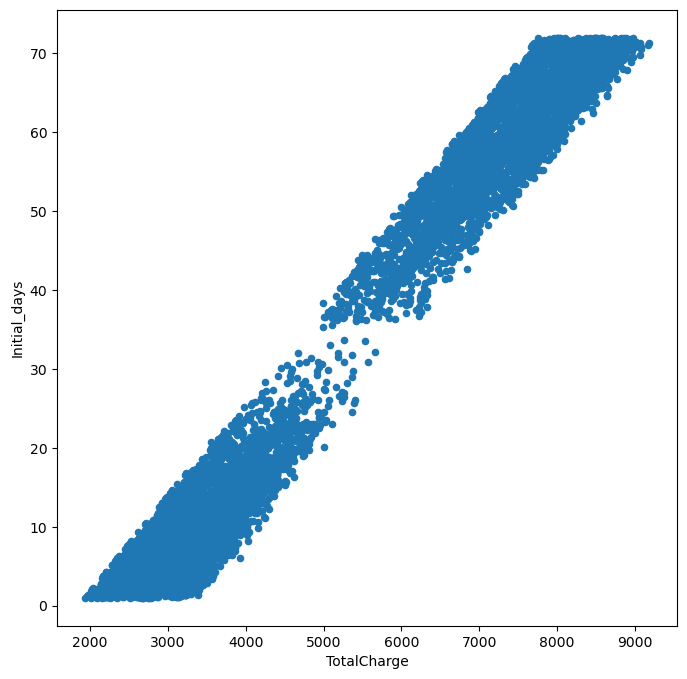

In [23]:
# TotalCharge and Initial_days

medical_df.plot.scatter(x='TotalCharge', y='Initial_days', marker = "o", figsize=(8,8))

<Axes: xlabel='TotalCharge', ylabel='ReAdmis'>

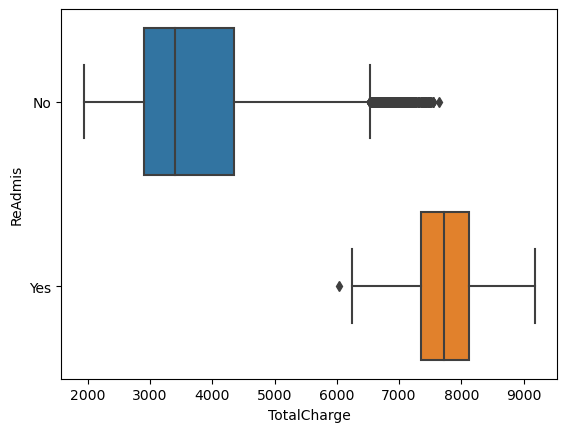

In [24]:
# ReAdmis and TotalCharge

sns.boxplot(x = 'TotalCharge', y = 'ReAdmis', data = medical_df)

<Axes: xlabel='Initial_days', ylabel='ReAdmis'>

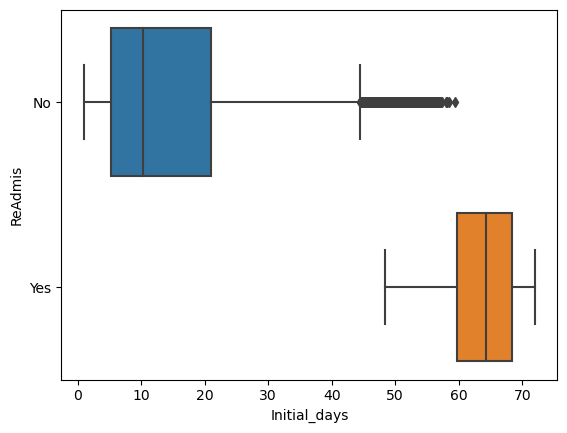

In [25]:
# ReAdmis and Initial_days

sns.boxplot(x = 'Initial_days', y = 'ReAdmis', data = medical_df)

In [26]:
# Encoding binary variables for ReAdmis

bin_col = ['ReAdmis']
bin_dict = {'Yes': 1, 'No': 0}
for col in bin_col:
    medical_df[col] = medical_df[col].replace(bin_dict)
medical_df.head()

,ReAdmis,TotalCharge,Initial_days
0,0,3726.702860,10.585770
1,0,4193.190458,15.129562
2,0,2434.234222,4.772177
3,0,2127.830423,1.714879
4,0,2113.073274,1.254807


In [27]:
# Standardize data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

medical_df_in = medical_df.drop(['ReAdmis'], axis = 1)
medical_df_std = pd.DataFrame(scaler.fit_transform(medical_df_in),columns = medical_df_in.columns)
medical_df_rsp = medical_df['ReAdmis']
frame = [medical_df_rsp, medical_df_std]

medical_df_std = pd.concat(frame, axis = 1)
medical_df_std.head()

# send to csv
medical_df_std.to_csv("medical_df_std_cleaned.csv")

In [28]:
# Split the data into training and test sets

X = medical_df_std.drop(['ReAdmis'], axis = 1)
y = medical_df_std['ReAdmis']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2,
                                                     random_state = 42, stratify = y)

In [29]:
frame_train = [X_train, y_train]
medical_df_train = pd.concat(frame_train, axis = 1)

# send to csv

medical_df_train.to_csv("medical_df_train_set.csv")

In [30]:
frame_test = [X_test, y_test]
medical_df_test = pd.concat(frame_test, axis = 1)

# send to csv
medical_df_test.to_csv("medical_df_test_set.csv")

In [31]:
# Verify split

len(medical_df_train)
len(medical_df_test)
medical_df_train['ReAdmis'].value_counts()
medical_df_test['ReAdmis'].value_counts()
len(medical_df_train[medical_df_train['ReAdmis']==0])/len(medical_df_train)
len(medical_df_test[medical_df_test['ReAdmis']==0])/len(medical_df_test)

0.633

In [32]:
# KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
y_test

7752    1
7921    1
4673    0
3369    0
2626    0
       ..
3146    0
2255    0
6493    0
6867    1
2950    0
Name: ReAdmis, Length: 2000, dtype: int64

In [34]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
# Confusion Matrix

cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

[[1241   25]
 [  16  718]]


In [36]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1266
           1       0.97      0.98      0.97       734

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [37]:
print(knn.score(X_test, y_test))

0.9795


In [38]:
# Performance Metrics

total = cmatrix[0,0] + cmatrix[1,0], + cmatrix[0,1] + cmatrix[1,1]

In [39]:
# Accuracy Score

acc = (cmatrix[0,0] + cmatrix[1,1]) / (total[0] + total[1])
print('Accuracy score is: {}'.format(acc))

Accuracy score is: 0.9795


In [40]:
# Sensitivity Score

sens = cmatrix[1,1]/(cmatrix[1,1] + cmatrix[1,0])
print('Sensitivity score is: {}'.format(sens))

Sensitivity score is: 0.9782016348773842


In [41]:
# Specificity Score

spec = cmatrix[0,0]/(cmatrix[0,0] + cmatrix[0,1])
print('Specificity score is: {}'.format(spec))

Specificity score is: 0.9802527646129542


In [ ]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 155)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("KNN: varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# ROC Curve (Receiver Operating Characterisitic)

from sklearn.metrics import roc_curve

y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)

In [ ]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# AUC

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: {}'.format(auc))

In [ ]:
# Test Parameters



In [ ]:
# Metrics


In [ ]:
# Grid Search

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(5, 155, 10), 'metric': ('manhattan', 'euclidean', 'minkowski'), 'weights': ('uniform', 'distance')}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 10)
knn_cv.fit(X_train, y_train)
print('Best params: {}'.format(knn_cv.best_params_))
print('Best score: {}'.format(knn_cv.best_score_))

In [ ]:
# Test Classifier

X = medical_df_std.drop(['ReAdmis'], axis = 1)
y = medical_df_std['ReAdmis']

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.2,
                                                     random_state = 42, stratify = y)

In [ ]:
frame_train = [X_train, y_train]
medical_df_train = pd.concat(frame_train, axis = 1)

In [ ]:
frame_test = [X_test, y_test]
medical_df_test = pd.concat(frame_test, axis = 1)


In [ ]:
# Run best parameters

knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 125, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
# Metrics

cmatrix_two = confusion_matrix(y_test, y_pred)
print(cmatrix_two)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
acc_two = (cmatrix_two[0,0] + cmatrix_two[1,1]) / (total[0] + total[1])
print('Accuracy score is: {}'.format(acc_two))

In [ ]:
# Sensitivity Score

sens = cmatrix_two[1,1]/(cmatrix_two[1,1] + cmatrix_two[1,0])
print('Sensitivity score is: {}'.format(sens))

In [ ]:
# Specificity Score

spec = cmatrix_two[0,0]/(cmatrix_two[0,0] + cmatrix_two[0,1])
print('Specificity score is: {}'.format(spec))

In [ ]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# AUC

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: {}'.format(auc))